<a href="https://colab.research.google.com/github/HasangaDineliKavindya/Hasanga-/blob/main/Copy_of_MLSDGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
drive.mount('/content/drive')
# Set the path to the dataset
train_dir = '/content/drive/MyDrive/ML/archive/blur_dataset_scaled'
validation_dir = '/content/drive/MyDrive/ML/archive/blur_dataset_scaled'
test_dir = '/content/drive/MyDrive/ML/archive/blur_dataset_scaled'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1050 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1050 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1050 images belonging to 3 classes.


In [ ]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Three classes: motion blur, sharp, defocused blur
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

33/33 - 68s - loss: 0.0100 - accuracy: 0.9981 - 68s/epoch - 2s/step
Test accuracy: 0.9980952143669128


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
32/32 [==============================] - 324s 10s/step - loss: 1.3130 - accuracy: 0.3890 - val_loss: 0.9405 - val_accuracy: 0.5146
Epoch 2/20
32/32 [==============================] - 240s 8s/step - loss: 0.8619 - accuracy: 0.5488 - val_loss: 0.7918 - val_accuracy: 0.6240
Epoch 3/20
32/32 [==============================] - 228s 7s/step - loss: 0.7467 - accuracy: 0.6415 - val_loss: 0.6855 - val_accuracy: 0.6719
Epoch 4/20
32/32 [==============================] - 233s 7s/step - loss: 0.6729 - accuracy: 0.6827 - val_loss: 0.6343 - val_accuracy: 0.7227
Epoch 5/20
32/32 [==============================] - 224s 7s/step - loss: 0.6190 - accuracy: 0.6965 - val_loss: 0.5544 - val_accuracy: 0.8027
Epoch 6/20
32/32 [==============================] - 222s 7s/step - loss: 0.5165 - accuracy: 0.7613 - val_loss: 0.3759 - val_accuracy: 0.8613
Epoch 7/20
32/32 [==============================] - 234s 7s/step - loss: 0.4148 - accuracy: 0.8291 - val_loss: 0.3399 - val_accuracy: 0.8828
Epoch 8/20
3

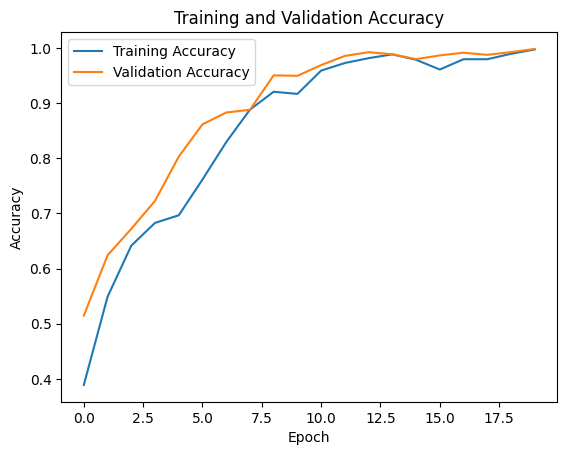

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Training and Validation Accuracy')  # Set title
plt.xlabel('Epoch')  # Label x-axis
plt.ylabel('Accuracy')  # Label y-axis
plt.legend()  # Show legend
plt.show()  # Show plot


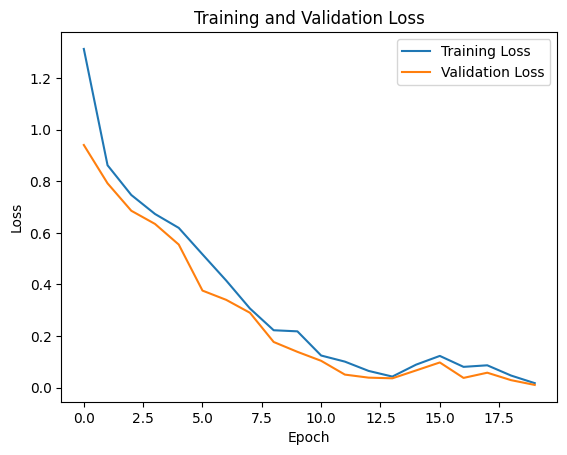

In [ ]:


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# Define the path where you want to save the model
saved_model_path = r'Ml.h5'

# Save the model
model.save(saved_model_path)

# Load the saved model
loaded_model = tf.keras.models.load_model(saved_model_path)



In [ ]:
print(loaded_model)



In [ ]:
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
def predict_and_check(image_path, threshold=0.5):
    img = preprocess_image(image_path)
    prediction = loaded_model.predict(img)
    class_idx = np.argmax(prediction)
    classes = ['Defocused Blur','Motion Blur','Sharp']
    predicted_class = classes[class_idx]
    confidence = prediction[0][class_idx]

    # Check if the predicted class is either defocused blur or motion blur
    if predicted_class in ['Defocused Blur', 'Motion Blur'] and confidence > threshold:
        # If the confidence level for defocused blur or motion blur exceeds the threshold, reject the image
        return "Rejected", predicted_class, confidence
    else:
        return "Accepted", predicted_class, confidence


In [ ]:
# Input the path to your image
image_path = '/content/drive/MyDrive/download.jpeg'

In [ ]:
# Predict the class of the input image and check for defocused blur or motion blur
acceptance_status, predicted_class, confidence = predict_and_check(image_path)


1/1 [==============================] - 0s 48ms/step


In [ ]:
# Display the prediction status and details
print("Prediction Status:", acceptance_status)
print("Predicted Class:", predicted_class)
print("Confidence:", confidence)

Prediction Status: Rejected
Predicted Class: Motion Blur
Confidence: 0.8238058


In [ ]:
# If the image is accepted, display the input image
if acceptance_status == "Accepted":
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()